# Bitcoin Price Analysis and Prediction

### Importing Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Import and read dataset

In [4]:
'''Define a function called read_data'''
data=None
def first_10_rows():
    global data
    try:
        '''Use the pandas function read_csv() to read in a CSV file named bitcoin_prices2.csv and store the resulting DataFrame object in a variable named data'''
        data = pd.read_csv("Dataset/bitcoin_prices2.csv")
    except FileNotFoundError:
        print("The file does not exist :(")
    else: 
        '''Use the head() function to print the first 10 rows of the DataFrame'''
        print(data.head(10))
first_10_rows()

   open  high   low  close  tick_volume  year  month  day
0  5.26  5.47  4.80   5.21        69150  2012      1    2
1  5.22  5.29  4.65   4.88       125170  2012      1    3
2  4.88  5.70  4.75   5.57       131170  2012      1    4
3  5.57  7.22  5.57   6.94       182328  2012      1    5
4  6.95  7.21  6.13   6.70       218077  2012      1    6
5  7.11  7.19  5.81   6.32       148406  2012      1    9
6  6.33  6.89  6.00   6.36       110210  2012      1   10
7  6.45  7.14  6.41   6.90        99442  2012      1   11
8  6.90  7.00  6.34   6.80       140116  2012      1   12
9  6.80  6.80  6.40   6.41        60228  2012      1   13


### Data Cleaning

Missing Value

In [5]:
def null_val():
    if data is None:
        print("Call first_10_rows() first..")
    else:
        print("Number of null values in each column:")
        print(data.isnull().sum())
null_val()

Number of null values in each column:
open           0
high           0
low            0
close          0
tick_volume    0
year           0
month          0
day            0
dtype: int64


Duplicate data

In [7]:
def dup_val():
    if data is None:
        print("Call first_10_rows() first..")
    else:
        print("Number of duplicate rows:",end=" ")
        print(data.duplicated().sum())
dup_val()

Number of duplicate rows: 0


### Data Analysis


Average Closing Prices of the Stock for Each Month in the Year

In [8]:
def avg_price():
    if data is None:
        print("Call first_10_rows() first..")
    else:
        ''' Convert 'year', 'month', and 'day' columns into a datetime column'''
        data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

        ''' Group the data by month and calculate the average closing price for each month'''
        avg_close_price = data.groupby(data['date'].dt.strftime('%Y-%m'))['close'].mean()

        ''' Print the resulting series'''
        print(avg_close_price)
        # print(avg_close_price.to_string())
avg_price()

date
2012-01        6.051818
2012-02        5.100952
2012-03        4.916364
2012-04        5.002857
2012-05        5.078261
               ...     
2020-08    11631.657143
2020-09    10684.284545
2020-10    11901.793636
2020-11    16650.635238
2020-12    21788.898182
Name: close, Length: 108, dtype: float64


Average Daily Price Range (High - Low) for a Given Month and Year

In [9]:
def filter_data(year,month):
    if data is None:
        print("Call first_10_rows() first..")
    else:
        '''Filter the data by year and month'''
        data_filtered = data[(data['year'] == year) & (data['month'] == month)].copy() 

        '''Calculate the daily price range and store it in a new column called price_range'''
        data_filtered['price_range'] = data_filtered['high'] - data_filtered['low']

        ''' Calculate the average daily price range for the selected month and year'''
        avg_price_range = data_filtered['price_range'].mean()

        print(f'The average daily price range for {month}/{year} was: {avg_price_range}')

# year = int(input("Enter the year:"))
# month = int(input("Enter the month:"))
year = 2020
month = 1
filter_data(year,month)

The average daily price range for 1/2020 was: 406.90636363636366


Total Tick Volume for Each Year in the Dataset

In [10]:
def tick_vol():
    if data is None:
        print("Call first_10_rows() first..")
    else:
        yearly_tick_volume = data.groupby('year')['tick_volume'].sum()
        print(yearly_tick_volume)
tick_vol()

year
2012     16069420
2013    344894281
2014      2400003
2015      2384980
2016      4923692
2017    339002469
2018    558906751
2019    415228459
2020    478490502
Name: tick_volume, dtype: int64


### Grouping DataFrame by Year and Finding the Mean Value

In [11]:
def group_by_year_mean():
    ''' Group the DataFrame by year and calculate the mean value for each column'''
    df_mean = data.groupby('year', as_index=False).mean()

    '''Print the resulting DataFrame'''
    print(df_mean)

group_by_year_mean()

   year          open          high           low         close   tick_volume  \
0  2012      8.249119      8.482605      8.034674      8.303602  6.156866e+04   
1  2013    182.396475    195.594023    170.112989    185.867663  1.321434e+06   
2  2014    520.448123    534.720881    502.673027    518.500077  9.195414e+03   
3  2015    268.885862    275.916628    263.178314    269.679579  9.137854e+03   
4  2016    560.208467    568.469004    552.945556    561.547548  1.886472e+04   
5  2017   4030.433980   4208.879728   3878.672007   4072.584116  1.153070e+06   
6  2018   7784.464930   8041.540000   7478.756503   7755.060839  1.954219e+06   
7  2019   7328.262819   7556.984942   7115.426564   7352.219653  1.603199e+06   
8  2020  11020.477846  11335.288615  10744.427808  11104.194962  1.840348e+06   

      month        day  
0  6.501916  15.819923  
1  6.513410  15.704981  
2  6.524904  15.750958  
3  6.540230  15.685824  
4  6.524904  15.708812  
5  6.731293  15.792517  
6  6.094406  1

## Data Visualization

### Visualizing Mean Value of "Open" Yearly

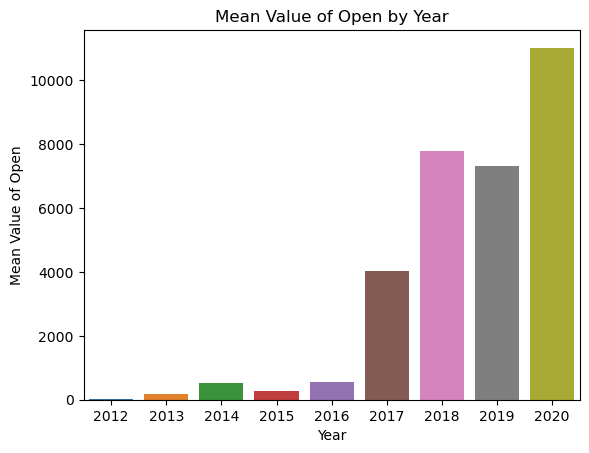

In [13]:
def plot_mean_open_by_year():
    ''' Use the groupby() and mean() methods to calculate the mean value of the open column for each year'''
    df_mean = data.groupby('year', as_index=False)['open'].mean()

    ''' Create a barplot using seaborn library'''
    sns.barplot(x='year', y='open', data=df_mean)
    
    plt.title('Mean Value of Open by Year')
    plt.xlabel('Year')
    plt.ylabel('Mean Value of Open')
    plt.show()
    
plot_mean_open_by_year()

### Visualizing Mean Value of "Close" Yearly

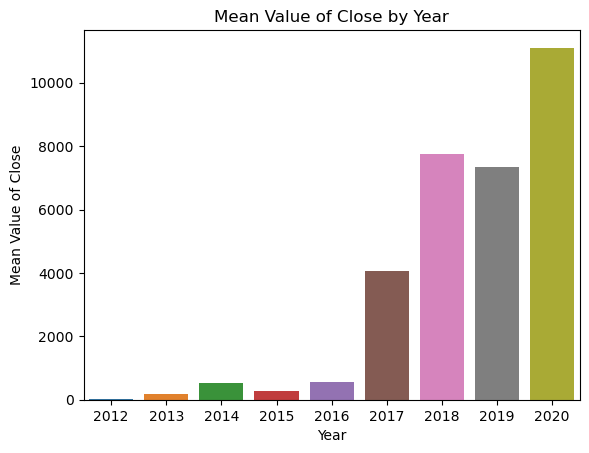

In [14]:
def plot_mean_close_by_year():
    ''' Use the groupby() and mean() methods to calculate the mean value of the close column for each year'''
    yearly_close_mean = data.groupby('year', as_index=False)['close'].mean()

    ''' Create a barplot using seaborn library'''
    sns.barplot(x='year', y='close', data=yearly_close_mean)
    
    plt.title('Mean Value of Close by Year')
    plt.xlabel('Year')
    plt.ylabel('Mean Value of Close')
    plt.show()
    
plot_mean_close_by_year()

### Grouping DataFrame by Year and Finding the Median Value

In [15]:
def group_by_year_median():
    ''' Group the DataFrame by year and calculate the median value for each column'''
    median_by_year = data.groupby('year').median()
    
    '''Print the resulting DataFrame'''
    print(median_by_year)
    
group_by_year_median()

          open     high       low     close  tick_volume  month   day
year                                                                 
2012     6.800     7.10     6.510     6.700      46830.0    7.0  16.0
2013   111.300   116.44   106.000   112.250      17966.0    7.0  16.0
2014   501.210   517.00   477.300   501.220       8073.0    7.0  16.0
2015   246.000   251.99   241.090   245.970       7811.0    7.0  16.0
2016   577.960   582.05   573.040   576.850      17009.0    7.0  16.0
2017  2622.985  2743.55  2547.640  2640.920     445335.0    7.0  16.0
2018  7138.750  7421.45  6868.370  7148.500    1278851.5    6.0  16.0
2019  7815.950  8115.60  7483.790  7831.450    1302461.0    7.0  16.0
2020  9672.340  9887.64  9467.515  9683.635    1752751.0    7.0  16.0


### Visualizing Median Value of "Open" Yearly

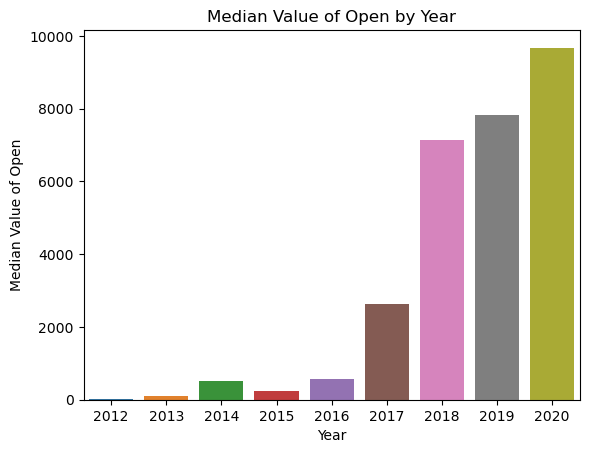

In [16]:
def plot_median_open_by_year():
    ''' Use the groupby() and median() methods to calculate the median value of the open column for each year'''
    df_median = data.groupby('year', as_index=False)['open'].median()

    ''' Create a barplot using seaborn library'''
    sns.barplot(x='year', y='open', data=df_median)
    
    plt.title('Median Value of Open by Year')
    plt.xlabel('Year')
    plt.ylabel('Median Value of Open')
    plt.show()
    
plot_median_open_by_year()


### Visualizing Median Value of "Close" Yearly

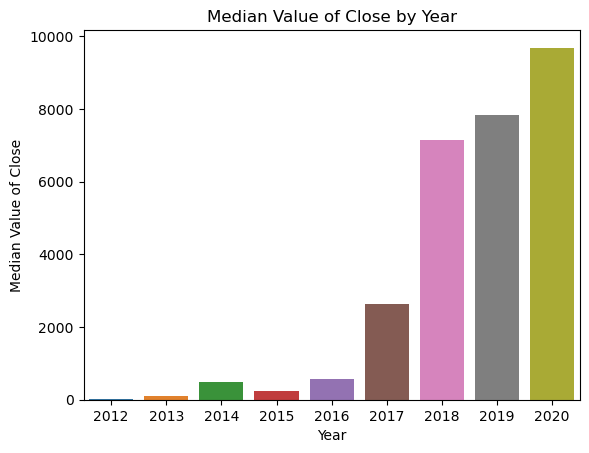

In [17]:
def plot_median_close_by_year():
    ''' Use the groupby() and median() methods to calculate the median value of the close column for each year'''
    yearly_close_median = data.groupby('year', as_index=False)['close'].median()

    ''' Create a barplot using seaborn library'''
    sns.barplot(x='year', y='close', data=yearly_close_median)
    
    plt.title('Median Value of Close by Year')
    plt.xlabel('Year')
    plt.ylabel('Median Value of Close')
    plt.show()
    
plot_median_close_by_year()


## Model Development & Evaluation

### Splitting Dataset

In [19]:
def train_model(data):
    '''Convert date column to UNIX timestamp'''
    if 'date' in data.columns:
        data['date'] = pd.to_datetime(data['date']).apply(pd.Timestamp.timestamp)
    
    '''Drop close column from the data DataFrame to create X'''
    X = data.drop(['close'], axis=1)
    
    '''Select close column from the data DataFrame to create y'''
    y = data['close']

    '''Split the data into training and testing sets with test_size=0.2 and random_state=42'''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    '''Create an instance of the LinearRegression() class'''
    lr_model = LinearRegression()

    '''Train the model on the training data'''
    lr_model.fit(X_train, y_train)

    '''Make predictions on the testing set'''
    y_pred = lr_model.predict(X_test)

    '''Return the trained model and the predicted y values'''
    return lr_model, y_pred, y_test

model, y_pred, y_test = train_model(data)

### Modeling & Evaluation

In [20]:
def evaluate_model(y_test, y_pred):
    '''Calculate the mean squared error (MSE) between the predicted and actual y values in the testing set'''
    mse = mean_squared_error(y_test, y_pred)

    '''Calculate the R-squared (coefficient of determination) between the predicted and actual y values in the testing set'''
    r2 = r2_score(y_test, y_pred)

    '''Print the results'''
    print('Mean squared error:', mse)
    print('R-squared:', r2)

evaluate_model(y_test, y_pred)

Mean squared error: 14192.646826186687
R-squared: 0.9992461774932835
